*Adarsh Sankar Rajesh Kumar Sangeetha - 32116239*

#Spotify Data Exploratory Analysis and Song Popularity Prediction


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dhruvjyotiswain/spotify2016popularsongs

  0% 0.00/97.7k [00:00<?, ?B/s]
100% 97.7k/97.7k [00:00<00:00, 60.4MB/s]


In [ ]:
!unzip spotify2016popularsongs.zip

Archive:  spotify2016popularsongs.zip
  inflating: data.csv                


Importing Libraries


In [ ]:
# Importing wanted libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("darkgrid")

# Load the dataset
df = pd.read_csv("/content/data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


Cleaning the Data


In [ ]:
# Data Cleaning

# Checking for missing values
missing_values = df.isna().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64


In [ ]:
# Display information about the DataFrame
df_info = df.info()
print("DataFrame Info:")
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   int64  
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(9), int64(5), object(2)
memory 

In [ ]:
# Display the shape of the DataFrame
df_shape = df.shape
print("DataFrame Shape:")
print(df_shape)

DataFrame Shape:
(2017, 16)


In [ ]:
# Display the columns of the DataFrame
df_columns = df.columns
print("DataFrame Columns:")
print(df_columns)

DataFrame Columns:
Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


In [ ]:
# Display summary statistics of the DataFrame
df_describe = df.describe()
print("DataFrame Summary Statistics:")
print(df_describe)

DataFrame Summary Statistics:
       acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000  

#Analysing the Data

Top Five Most Popular Artists

Top 5 Most Popular Artists are :
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Name: artist, dtype: int64


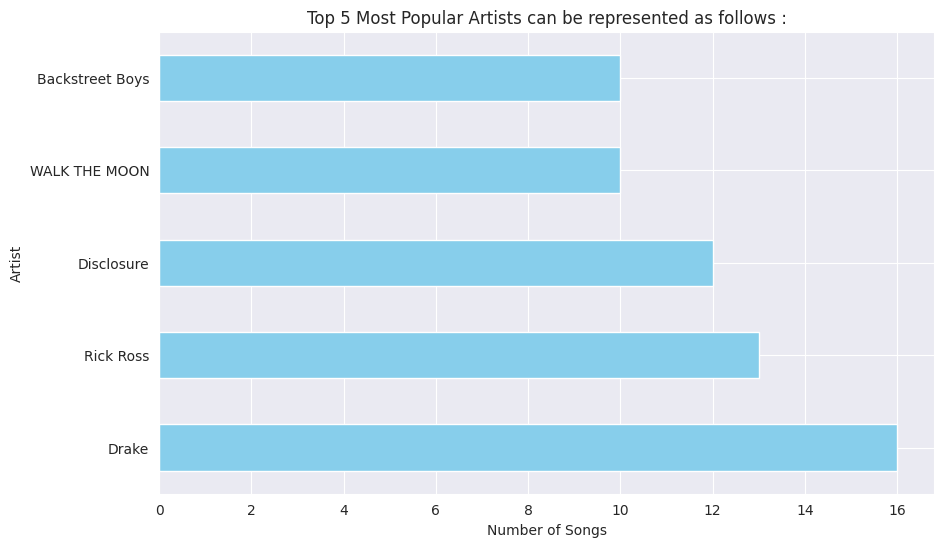

In [ ]:
# Top 5 most popular artists
top_five_artists = df['artist'].value_counts().nlargest(5)
print("Top 5 Most Popular Artists are :")
print(top_five_artists)

# Plotting a horizontal bar chart for the top 5 artists
plt.figure(figsize=(10, 6))
top_five_artists.plot(kind='barh', color='skyblue')
plt.title("Top 5 Most Popular Artists can be represented as follows :")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.show()

Top Five Loudest Tracks

Top 5 Loudest Tracks are :
      loudness                   song_title
195     -0.307                 GodLovesUgly
636     -0.718      The Lion - Original Mix
1443    -0.787                     The Wall
2010    -0.935  Hey Baby - Steve Aoki Remix
1299    -0.994                No Absolution


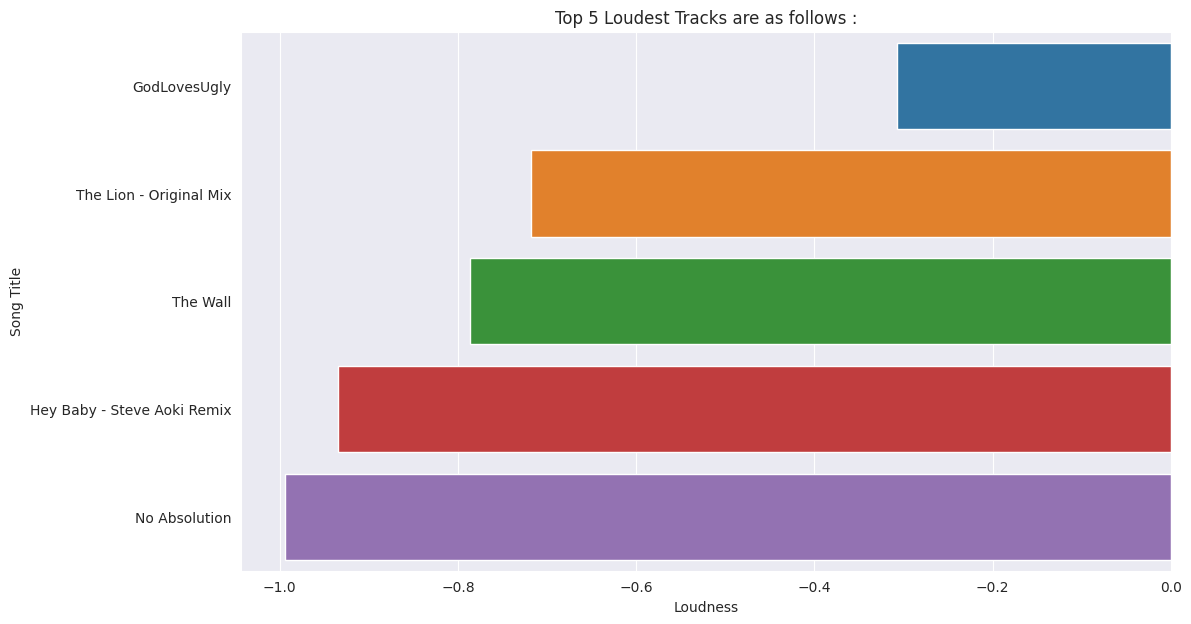

In [ ]:
# Top 5 loudest tracks
top_five_loudest_tracks = df[['loudness', 'song_title']].nlargest(5, 'loudness')
print("Top 5 Loudest Tracks are :")
print(top_five_loudest_tracks)

# Plotting a bar chart for the top 5 loudest tracks
plt.figure(figsize=(12, 7))
sns.barplot(x="loudness", y="song_title", data=top_five_loudest_tracks)
plt.title("Top 5 Loudest Tracks are as follows :")
plt.xlabel("Loudness")
plt.ylabel("Song Title")
plt.show()


Artist With The Most Danceable Song

Top 5 Artists with Most Danceable Songs are :
      danceability              song_title             artist
1433         0.984  Flashwind - Radio Edit       Ben Remember
1901         0.967                SexyBack  Justin Timberlake
604          0.962       Check Me Out Like          Blaqstarr
32           0.959             Best Friend         Young Thug
1957         0.959            Ice Ice Baby        Vanilla Ice


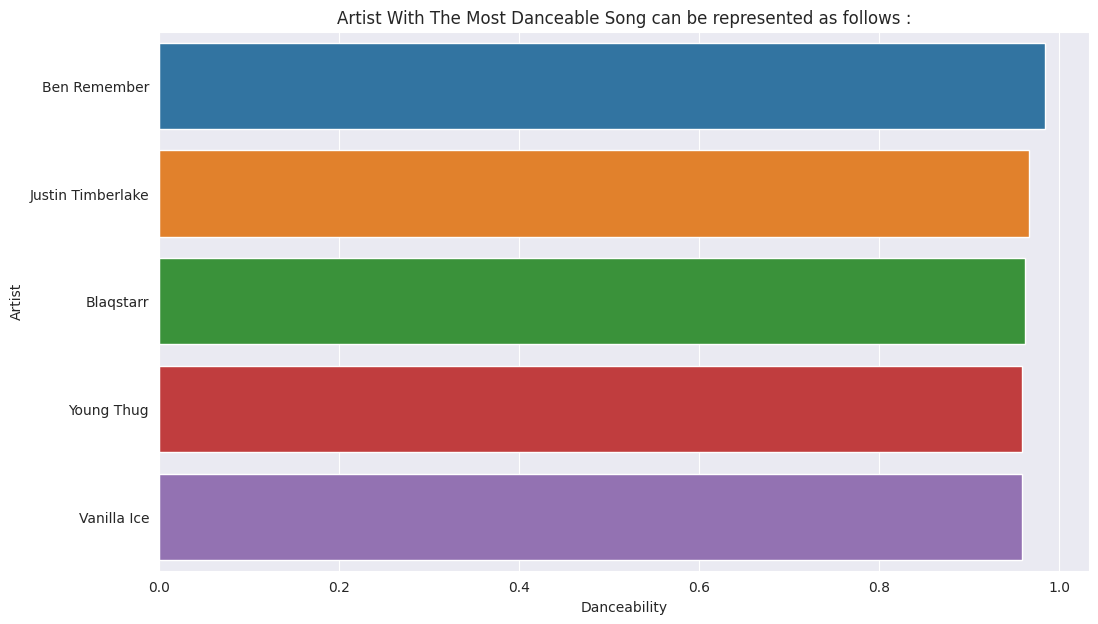

In [ ]:
# Artist with the most danceable song
top_five_artists_danceable_songs = df[['danceability', 'song_title', 'artist']].nlargest(5, 'danceability')
print("Top 5 Artists with Most Danceable Songs are :")
print(top_five_artists_danceable_songs)

# Plotting a bar chart for the danceability of songs by top 5 artists
plt.figure(figsize=(12, 7))
sns.barplot(x="danceability", y="artist", data=top_five_artists_danceable_songs)
plt.title("Artist With The Most Danceable Song can be represented as follows :")
plt.xlabel("Danceability")
plt.ylabel("Artist")
plt.show()

Top Ten Instrumental Tasks

Top 10 Instrumental Tracks are :
      instrumentalness                            song_title  \
1313             0.976                       Senseless Order   
271              0.968  So Destroyed (channeling Rage Peace)   
1575             0.964             A Hundred Dreams from Now   
1619             0.958                                 Raven   
725              0.957                     Strandbar (disko)   
1546             0.956                        Almas vaggvisa   
1322             0.955                            Pitchblack   
1349             0.954                       Prismatic Abyss   
1661             0.954                               Yebisah   
121              0.952                        Chasing Heaven   

                        artist  
1313        Signs of the Swarm  
271                Prince Rama  
1575                Ray Bryant  
1619             John Dahlbäck  
725                 Todd Terje  
1546         Jan Lundgren Trio  
1322  Walking Dead On Broadway 

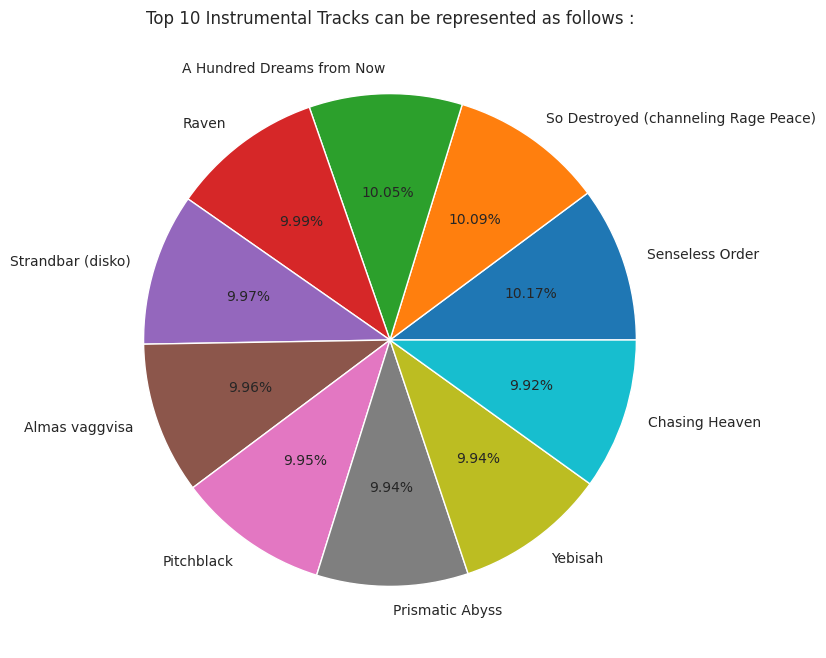

In [ ]:
# Top 10 instrumentalness tracks
top_ten_instrumental_tracks = df[['instrumentalness', 'song_title', 'artist']].nlargest(10, 'instrumentalness')
print("Top 10 Instrumental Tracks are :")
print(top_ten_instrumental_tracks)

# Plotting a pie chart for the instrumentalness of the top 10 tracks
plt.figure(figsize=(8, 8))
plt.pie(x=top_ten_instrumental_tracks['instrumentalness'], autopct='%1.2f%%', labels=top_ten_instrumental_tracks['song_title'])
plt.title("Top 10 Instrumental Tracks can be represented as follows :")
plt.show()


Top Ten Energetic Tracks

Top 10 Energetic Tracks are :
      energy           song_title
1299   0.998        No Absolution
1322   0.997           Pitchblack
1297   0.994    A Darkened Gospel
1347   0.993           Unanswered
1332   0.992      Beautiful Agony
1680   0.992             Paranoia
2015   0.992        First Contact
1328   0.991  Down into the Abyss
1296   0.990         Black Colors
1681   0.990                Hated


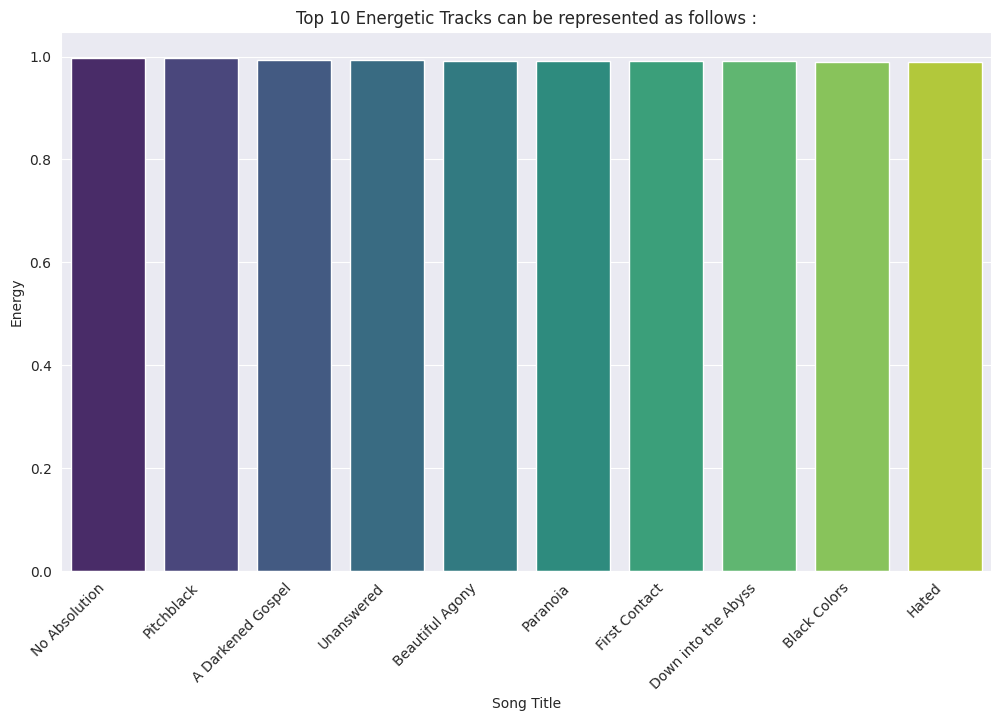

In [ ]:
# Top 10 energetic tracks
energetic_tracks = df[['energy', 'song_title']].nlargest(10, 'energy')
print("Top 10 Energetic Tracks are :")
print(energetic_tracks)

# Defining a color palette
colors = sns.color_palette("viridis", len(energetic_tracks))

# Plotting a horizontal bar chart for the energy of the top 10 tracks with colorful bars
plt.figure(figsize=(12, 7))
sns.barplot(x="song_title", y="energy", data=energetic_tracks, palette=colors)
plt.title("Top 10 Energetic Tracks can be represented as follows :")
plt.xlabel("Song Title")
plt.ylabel("Energy")
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.show()


Top Ten Tracks With Most Valence

Top 10 Tracks with Most Valence are:
      valence                                         song_title
460     0.992                             Abataka - Original Mix
912     0.975                I'm Walkin' - 2002 Digital Remaster
1966    0.974        To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)
48      0.973                              Azon de ma gnin kpevi
207     0.973                                        Look at You
337     0.972  Let's Lovedance Tonight - Danny Krivit Re-edit...
1590    0.972                                   Jelly On A Plate
838     0.971  Let's Lovedance Tonight - Danny Krivit Re-edit...
497     0.968                               Mi Swing es Tropical
72      0.967                                             Spooky


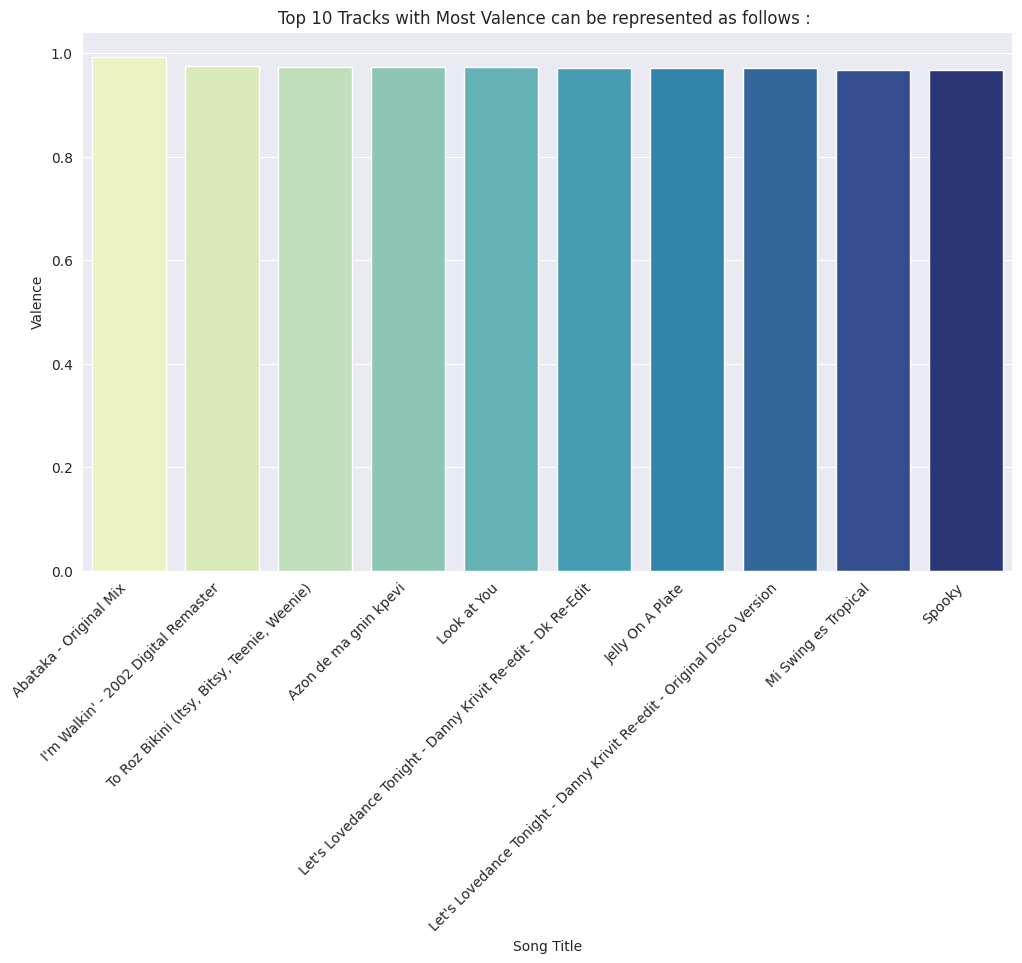

In [ ]:
# Top 10 tracks with most valence
trending_genre = df[['valence', 'song_title']].nlargest(10, 'valence')
print("Top 10 Tracks with Most Valence are:")
print(trending_genre)

# Defining a color palette
colors_valence = sns.color_palette("YlGnBu", len(trending_genre))

# Plotting a horizontal bar chart for the valence of the top 10 tracks with colorful bars
plt.figure(figsize=(12, 7))
sns.barplot(x="song_title", y="valence", data=trending_genre, palette=colors_valence)
plt.title("Top 10 Tracks with Most Valence can be represented as follows : ")
plt.xlabel("Song Title")
plt.ylabel("Valence")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Artists With The Most Number Of Songs - Top Five

Top 5 Most Popular Songs are:
song_title
Jack                                    3
River                                   3
I Know There's Gonna Be (Good Times)    2
Forever                                 2
What I Might Do - Club Mix              2
Name: artist, dtype: int64


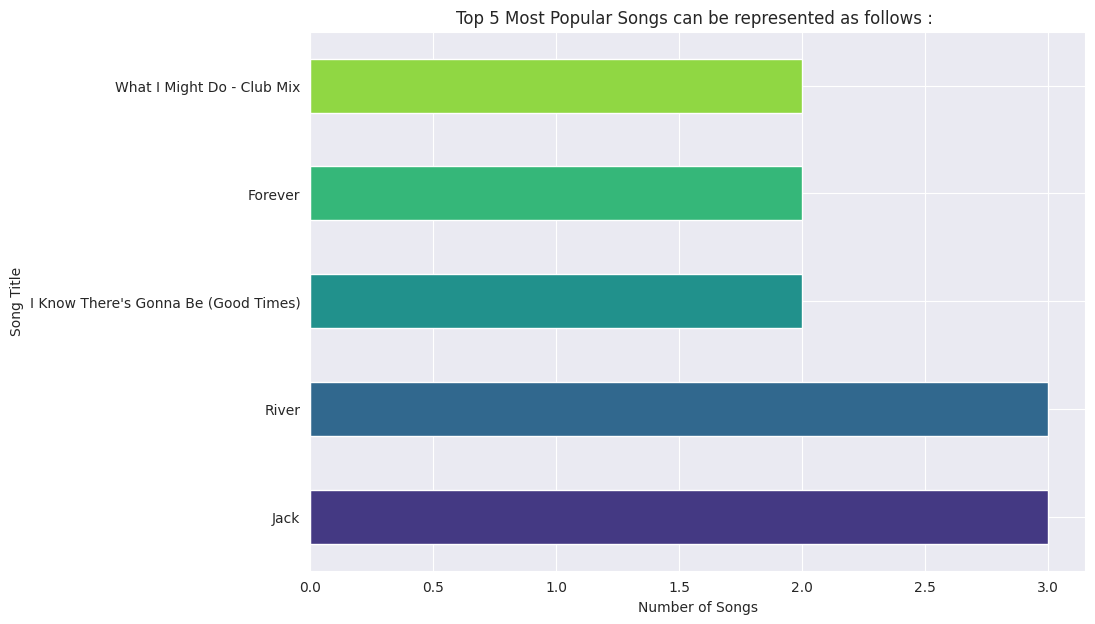

In [ ]:
# Artist with most number of songs (top 5)
most_popular = df.groupby("song_title").count().sort_values(by="artist", ascending=False)["artist"][:5]
print("Top 5 Most Popular Songs are:")
print(most_popular)

# Defining a color palette
colors_popular = sns.color_palette("viridis", len(most_popular))

# Plotting a horizontal bar chart for the most popular songs with colorful bars
plt.figure(figsize=(10, 7))
most_popular.plot(kind='barh', color=colors_popular)
plt.title("Top 5 Most Popular Songs can be represented as follows : ")
plt.xlabel("Number of Songs")
plt.ylabel("Song Title")
plt.show()

Songs With The Most Liveness - Top FIVE

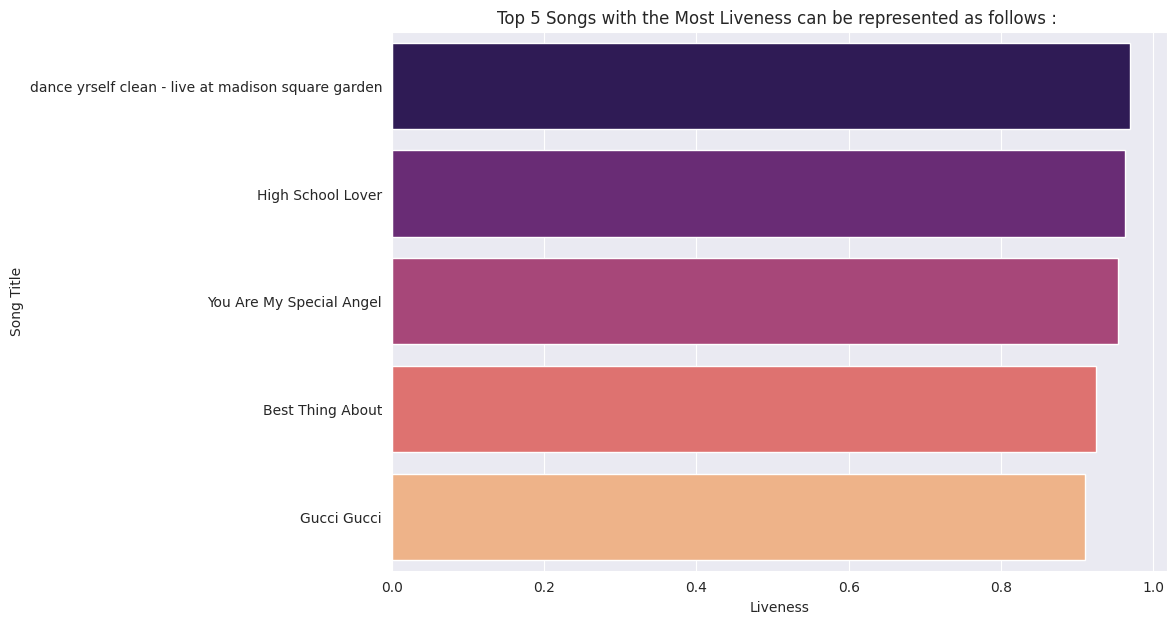

In [ ]:
# Top 5 songs with the most liveness
more_liveness = df.sort_values(by="liveness", ascending=False)[["song_title", "liveness"]][:5]

# Plot a bar chart for the liveness of the top 5 tracks
plt.figure(figsize=(10, 7))
sns.barplot(x="liveness", y="song_title", data=more_liveness, palette="magma")
plt.title("Top 5 Songs with the Most Liveness can be represented as follows : ")
plt.xlabel("Liveness")
plt.ylabel("Song Title")
plt.show()


Songs with More Danceability - Top Ten

In [ ]:
More_danceability = df.sort_values(by = "danceability",ascending=False)[["song_title","danceability"]][:10]
More_danceability

,song_title,danceability
1433,Flashwind - Radio Edit,0.984
1901,SexyBack,0.967
604,Check Me Out Like,0.962
32,Best Friend,0.959
1957,Ice Ice Baby,0.959
1136,Bad Liar,0.950
1977,Fuck Kd,0.947
138,Sippin On Some Syrup,0.944
623,I'm Different,0.941
1591,Little Green Apple,0.941


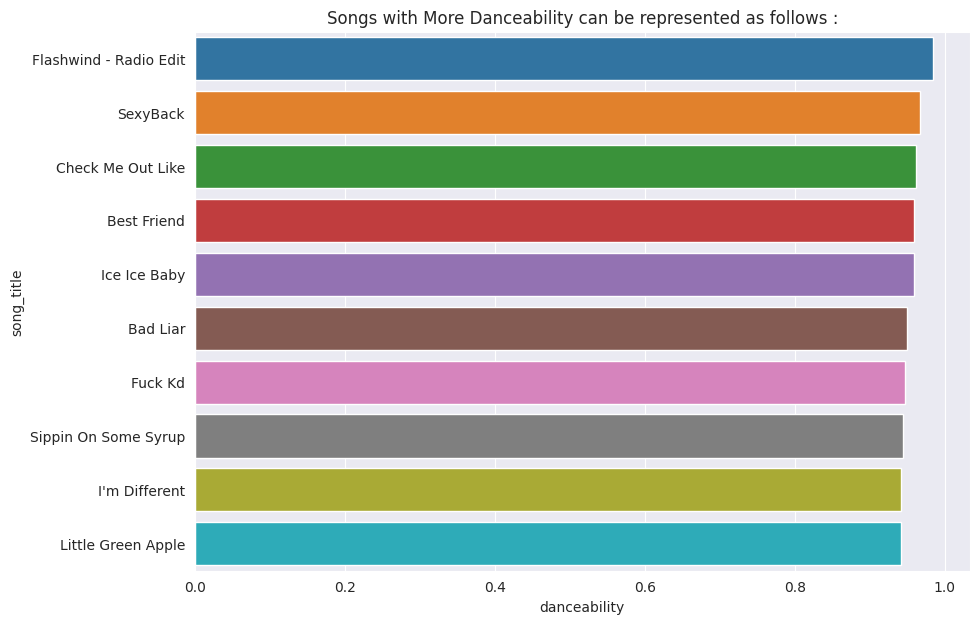

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x="danceability", y="song_title", data=More_danceability)
plt.title("Songs with More Danceability can be represented as follows :")
plt.show()

Songs With The Most Duration - Top Five

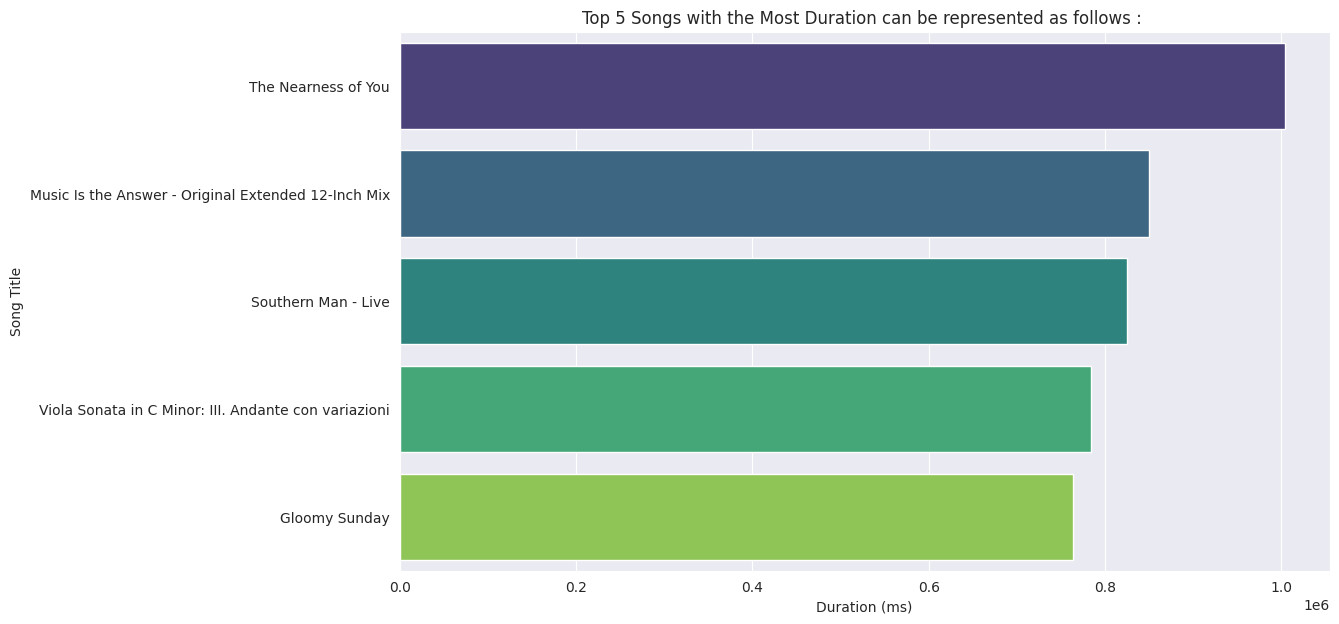

In [ ]:
# Top 5 songs with the most duration
most_duration = df.sort_values(by="duration_ms", ascending=False)[["song_title", "duration_ms"]][:5]

# Plotting a bar chart for the duration of the top 5 tracks
plt.figure(figsize=(12, 7))
sns.barplot(x="duration_ms", y="song_title", data=most_duration, palette="viridis")
plt.title("Top 5 Songs with the Most Duration can be represented as follows : ")
plt.xlabel("Duration (ms)")
plt.ylabel("Song Title")
plt.show()

Random Forest:
Best Model Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Cross-Validation Scores: [0.78947368 0.78018576 0.76160991 0.76397516 0.77950311]
Mean CV Accuracy: 0.7749495221429532
Accuracy on Test Set: 0.7821782178217822
Confusion Matrix:
[[158  48]
 [ 40 158]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       206
           1       0.77      0.80      0.78       198

    accuracy                           0.78       404
   macro avg       0.78      0.78      0.78       404
weighted avg       0.78      0.78      0.78       404



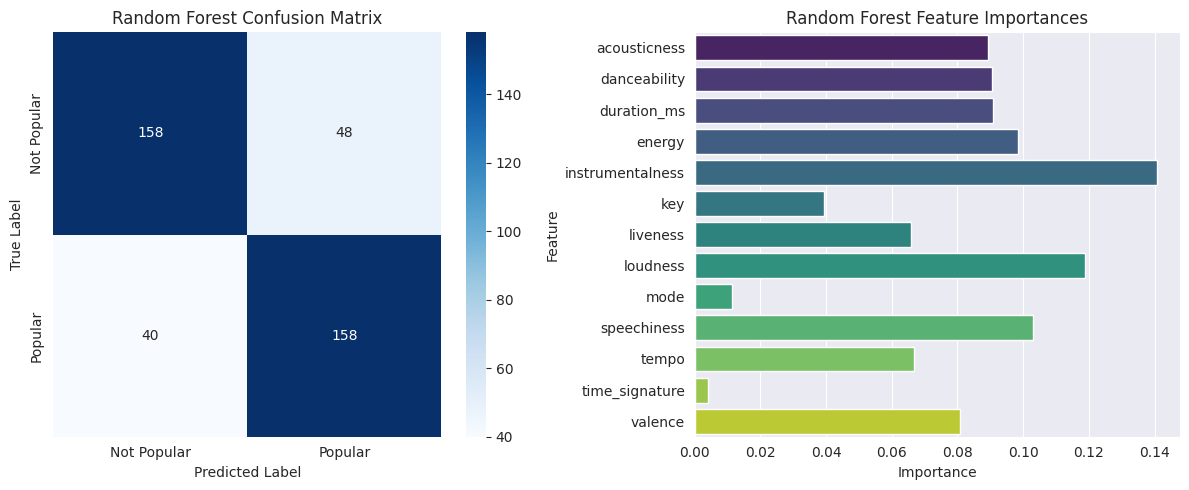

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


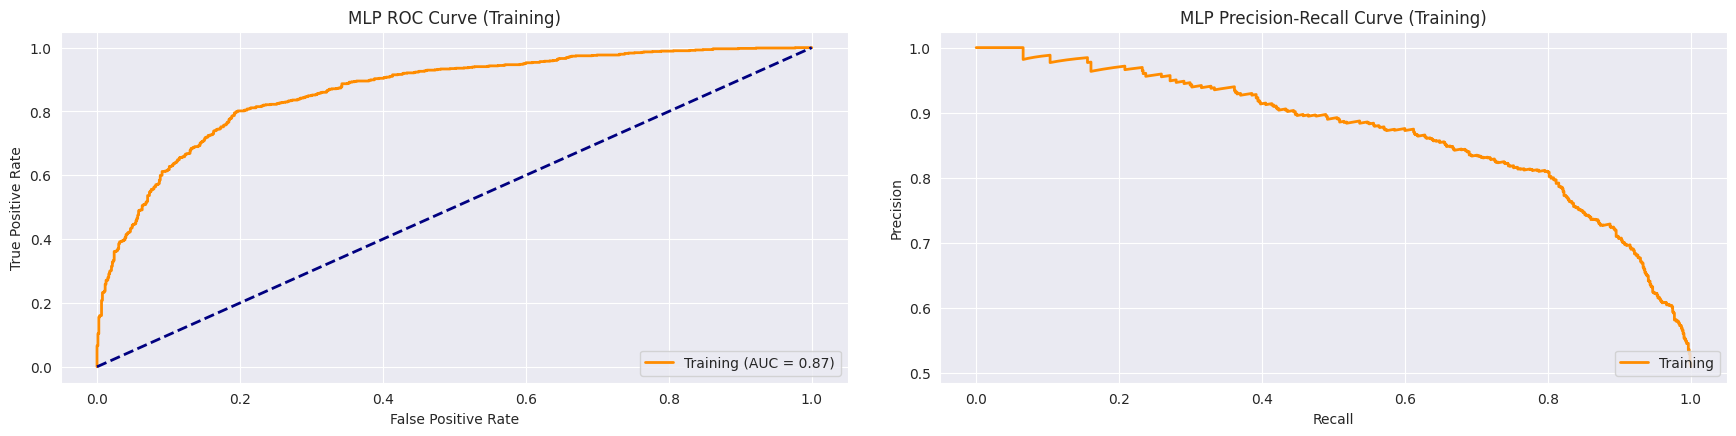

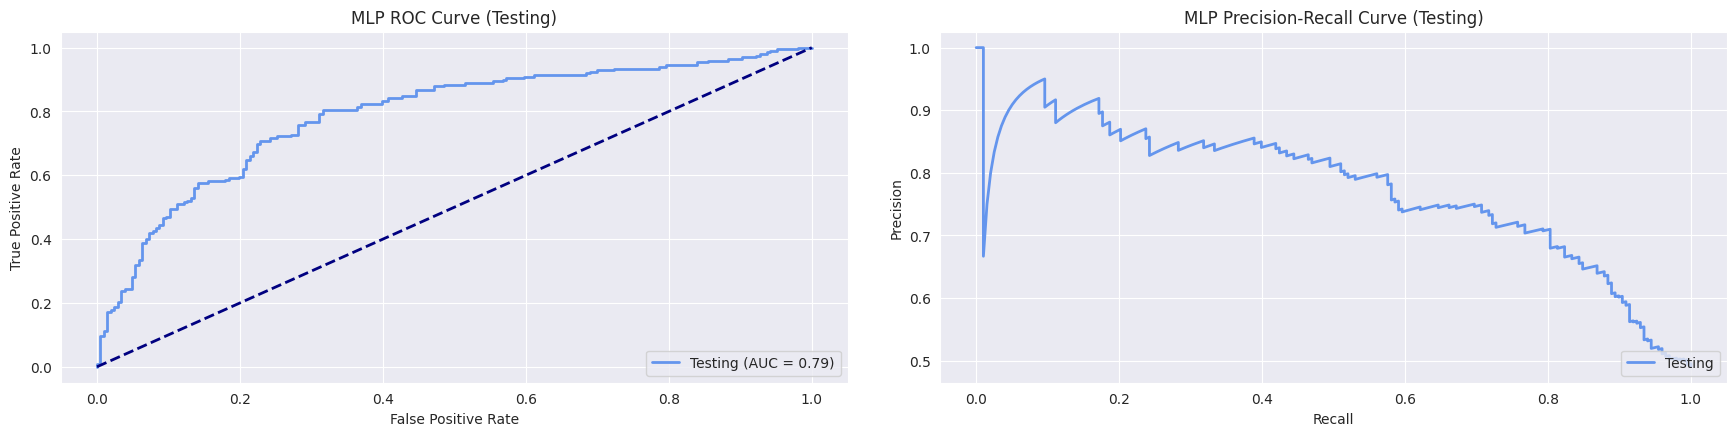

MLP:
Accuracy: 0.7351485148514851
Confusion Matrix:
[[160  46]
 [ 61 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       206
           1       0.75      0.69      0.72       198

    accuracy                           0.74       404
   macro avg       0.74      0.73      0.73       404
weighted avg       0.74      0.74      0.73       404



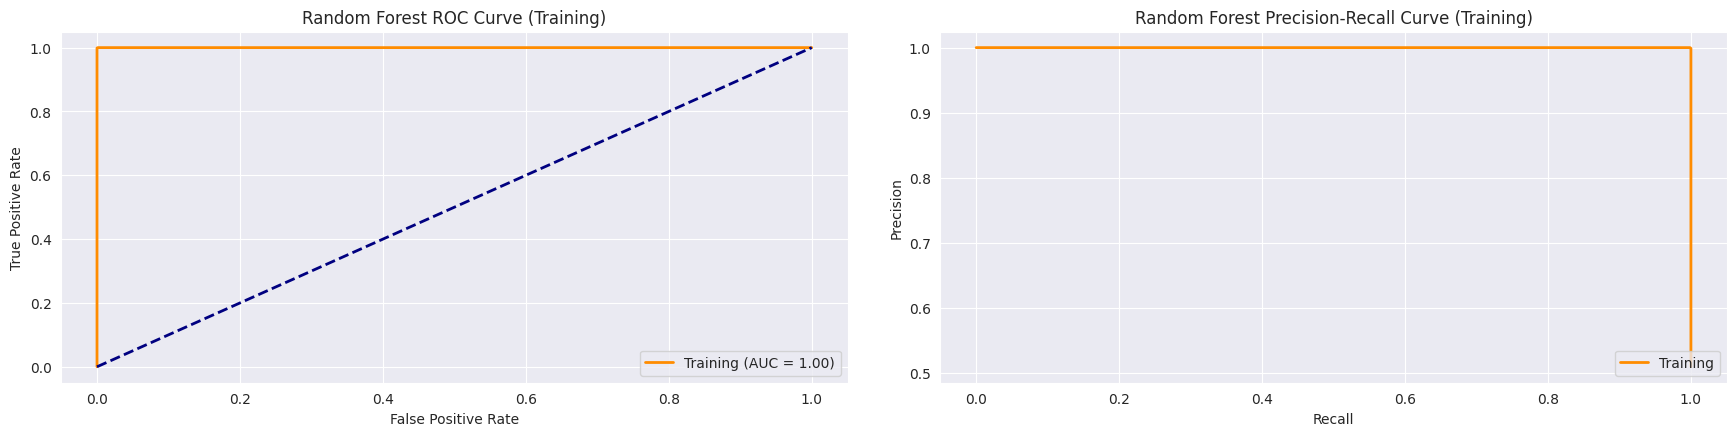

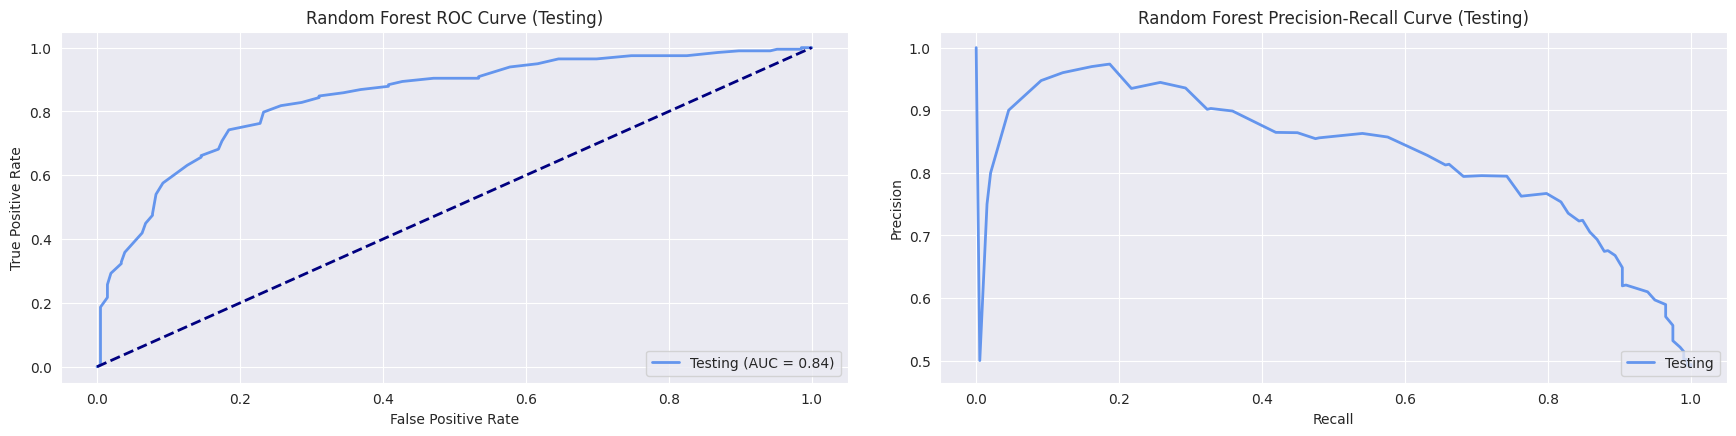

Random Forest:
Accuracy: 0.7821782178217822
Confusion Matrix:
[[158  48]
 [ 40 158]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       206
           1       0.77      0.80      0.78       198

    accuracy                           0.78       404
   macro avg       0.78      0.78      0.78       404
weighted avg       0.78      0.78      0.78       404



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time


# Loading the dataset
df = pd.read_csv("/content/data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

# Defining features (X) and target variable (y)
X = df.drop(['target', 'song_title', 'artist'], axis=1)  # Adjust features accordingly
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Constructing a pipeline with preprocessing and RandomForestClassifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('rf', RandomForestClassifier(random_state=42))
])

# Defining the parameter grid for grid search
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV with cross-validation for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Getting the best Random Forest model from grid search
best_rf_model = rf_grid_search.best_estimator_

# Cross-validating the best Random Forest model
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Making predictions on the test set using Random Forest
rf_predictions = best_rf_model.predict(X_test)

# Evaluating the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

# Printting evaluation metrics for Random Forest
print("Random Forest:")
print(f"Best Model Parameters: {rf_grid_search.best_params_}")
print(f"Cross-Validation Scores: {rf_cv_scores}")
print(f"Mean CV Accuracy: {rf_cv_scores.mean()}")
print(f"Accuracy on Test Set: {rf_accuracy}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")
print(f"Classification Report:\n{rf_class_report}")

# Visualizing the confusion matrix for Random Forest
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Visualizing feature importances for Random Forest
plt.subplot(1, 2, 2)
rf_feature_importances = best_rf_model.named_steps['rf'].feature_importances_
rf_features = X.columns
sns.barplot(x=rf_feature_importances, y=rf_features, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

# Function for model evaluation considering enhanced visualization
from sklearn.neural_network import MLPClassifier

# Constructing a pipeline with preprocessing and MLPClassifier
mlp_pipeline_proba = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing the features
    ('mlp', MLPClassifier(random_state=42))
])

# Defining the parameter grid for grid search for MLP with probability estimates
mlp_param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (50, 50), (20, 20, 20)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
}

# Initializing GridSearchCV with cross-validation for MLP with probability estimates
mlp_grid_search_proba = GridSearchCV(mlp_pipeline_proba, mlp_param_grid, cv=5, n_jobs=-1)
mlp_grid_search_proba.fit(X_train, y_train)

# Getting the best MLP model with probability estimates from grid search
best_mlp_model_proba = mlp_grid_search_proba.best_estimator_
def evaluate_model_visual(model, X_train, y_train, X_test, y_test, model_name):
    # Predictions on the training set
    train_predictions = model.predict(X_train)

    try:
        train_probabilities = model.predict_proba(X_train)[:, 1]
        fpr_train, tpr_train, _ = roc_curve(y_train, train_probabilities)
        precision_train, recall_train, _ = precision_recall_curve(y_train, train_probabilities)

        # Plot ROC curve
        # Plot ROC curve
        plt.figure(figsize=(18, 5))  # Increase the width to provide more space

# Subplotting for ROC curve
        plt.subplot(1, 2, 1)
        plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve (Training)')
        plt.legend(loc="lower right")

        # Subplotting for Precision-Recall curve
        plt.subplot(1, 2, 2)
        plt.plot(recall_train, precision_train, color='darkorange', lw=2, label='Training')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} Precision-Recall Curve (Training)')
        plt.legend(loc="lower right")

        plt.tight_layout(pad=3.0)  # Add space between subplots
        plt.show()


    except AttributeError:
        print(f"{model_name} does not support predict_proba. Skipping ROC and Precision-Recall curves for training.")

    # Predictions on the test set
    test_predictions = model.predict(X_test)

    try:
        test_probabilities = model.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, _ = roc_curve(y_test, test_probabilities)
        precision_test, recall_test, _ = precision_recall_curve(y_test, test_probabilities)

        # Plotting ROC curve
        plt.figure(figsize=(18, 5))

        plt.subplot(1, 2, 1)
        plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label='Testing (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve (Testing)')
        plt.legend(loc="lower right")

        # Plotting Precision-Recall curve
        plt.subplot(1, 2, 2)
        plt.plot(recall_test, precision_test, color='cornflowerblue', lw=2, label='Testing')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} Precision-Recall Curve (Testing)')
        plt.legend(loc="lower right")
    except AttributeError:
        print(f"{model_name} does not support predict_proba. Skipping ROC and Precision-Recall curves for testing.")

    plt.tight_layout(pad=3.0)  # Add space between subplots
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, test_predictions)

    # Printing evaluation metrics
    accuracy = accuracy_score(y_test, test_predictions)
    class_report = classification_report(y_test, test_predictions)

    print(f"{model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

evaluate_model_visual(best_mlp_model_proba, X_train, y_train, X_test, y_test, 'MLP')

# Visualizing the results with probability estimates for Random Forest
evaluate_model_visual(best_rf_model, X_train, y_train, X_test, y_test, 'Random Forest')









## ***Inference after close study on both strategies***

**For Good Performance:**

If we want accurate and well-rounded results, go for the Random Forest model.
It excels in precision and overall effectiveness.

**For Considering Interpretability and Efficiency:**

If we prioritize understanding the model or need efficient computing, think about the MLP model.
We also have to be cautious about potential instability during convergence needs attention.



Our choice should match what your task needs considering the trade-offs between accuracy, stability, and interpretability, especially in the Spotify dataset context.

In [ ]:
|